<a href="https://colab.research.google.com/github/earlyhidayati/Hybrid-Extreme-Rotation-Forest/blob/master/HERF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
pip install pandas

In [0]:
#!/usr/bin/python

import os, time#, csv
import matplotlib.pyplot as plt
#import random
import numpy as np
#import graphviz
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [0]:
#from sklearn import cross_validation
from time import time
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
def myBoxPlot(dData, dots = True, figName = 'boxPlot.png', Title = '',dpi=600):
    xLabel = 'Akurasi'; yLabel = 'Model'
    Labels = list(dData.keys())
    Data = [np.array(dData[d]['scores']) for d in dData.keys()]
    N = len(Data); pos = np.arange(N) + 1 
    fig = plt.figure(1, figsize=(9, 6)) 
    ax1 = fig.add_subplot(111) 
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5) 
    ax1.set_axisbelow(True)
    ax1.set_title(Title); ax1.set_xlabel(xLabel, size=32); ax1.set_ylabel(yLabel)
    BP = ax1.boxplot(Data,positions=pos,labels=Labels,notch=True, vert=False) 
    for box in BP['boxes']: 
        box.set( color='#7570b3', linewidth=2) 
    if dots:
        for i,dt in zip(pos,Data):
            y = dt
            x = np.random.normal(i, 0.03, size=len(y))
            ax1.plot(y, x, 'b.', alpha=0.30, markersize = 5) # Flip this for vertical BP
    fig.savefig(figName, bbox_inches='tight', pad_inches = 0, dpi=dpi)
    plt.show()

In [0]:
def get_ncbi_path():
    """
    Returns the path to the NCBI datasets, depending on the 
    host name.

    :return: string
    """
    path = 'ncbi-datasets'

    return path

In [0]:
def read_ncbi_dataset(base_dir, dataset_idx=1):
    """
    This function returns the path to the NCBI dataset

    :param base_dir: string
    The path to where the NCBI datasets folder are.

    :param dataset_idx: int
    The number of the dataset

    :return: 2-tuple of ndarray
    The dataset in a Numpy array,
    the first is the data samples and the second, the labels
    """

# Load the data
path = os.path.join(base_dir, str(dataset_idx) + '.data')

In [0]:

def read_ncbi_dataset(base_dir, dataset_idx=1):
    """
    This function returns the path to the NCBI dataset

    :param base_dir: string
    The path to where the NCBI datasets folder are.

    :param dataset_idx: int
    The number of the dataset

    :return: 2-tuple of ndarray
    The dataset in a Numpy array,
    the first is the data samples and the second, the labels
    """

    # Load the data
    path = os.path.join(base_dir, str(dataset_idx) + '.data')

    data = np.genfromtxt(path, delimiter=",")
    rows, cols = data.shape

    # Delete the first column of labels
    Y = data[:, 0]
    X = data[:, 1:rows]

    return X, Y

In [45]:
import pandas as pd
df = pd.read_csv ('/content/drive/My Drive/HERF/Dataset/ncbi-datasets.csv')
print ('df')

df


In [46]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,Y
0,Asp,0.761905,0.238095,24,0.785714,0.214286,40,0.793651,0.206349,56,0.619048,0.380952,34,0.571429,0.428571,58,0.603175,0.396825,83,0.571429,0.428571,30,0.547619,0.452381,58,0.603175,0.396825,79,0.666667,0.333333,26,0.666667,0.333333,54,0.698413,0.301587,77,0.825397,0.174603,20,...,0.728261,0.271739,40,0.900000,0.100000,6,0.786885,0.213115,18,0.728261,0.271739,36,0.666667,0.333333,15,0.557377,0.442623,27,0.565217,0.434783,45,0.766667,0.233333,12,0.622951,0.377049,22,0.565217,0.434783,39,0.766667,0.233333,14,0.606557,0.393443,28,0.576087,0.423913,41,1
1,Asp,0.761905,0.238095,24,0.785714,0.214286,40,0.793651,0.206349,56,0.619048,0.380952,34,0.571429,0.428571,58,0.603175,0.396825,83,0.571429,0.428571,30,0.547619,0.452381,58,0.603175,0.396825,79,0.666667,0.333333,26,0.666667,0.333333,54,0.698413,0.301587,77,0.825397,0.174603,20,...,0.656000,0.344000,60,0.487805,0.512195,23,0.578313,0.421687,38,0.600000,0.400000,58,0.634146,0.365854,18,0.650602,0.349398,42,0.600000,0.400000,66,0.560976,0.439024,19,0.602410,0.397590,42,0.544000,0.456000,66,0.487805,0.512195,16,0.518072,0.481928,38,0.528000,0.472000,68,1
2,Asp,0.761905,0.238095,24,0.785714,0.214286,40,0.793651,0.206349,56,0.619048,0.380952,34,0.571429,0.428571,58,0.603175,0.396825,83,0.571429,0.428571,30,0.547619,0.452381,58,0.603175,0.396825,79,0.666667,0.333333,26,0.666667,0.333333,54,0.698413,0.301587,77,0.825397,0.174603,20,...,0.758170,0.241830,42,0.843137,0.156863,9,0.705882,0.294118,34,0.705882,0.294118,54,0.549020,0.450980,23,0.588235,0.411765,49,0.588235,0.411765,77,0.549020,0.450980,25,0.568627,0.431373,50,0.535948,0.464052,79,0.529412,0.470588,21,0.519608,0.480392,44,0.529412,0.470588,73,1
3,Asp,0.761905,0.238095,24,0.785714,0.214286,40,0.793651,0.206349,56,0.619048,0.380952,34,0.571429,0.428571,58,0.603175,0.396825,83,0.571429,0.428571,30,0.547619,0.452381,58,0.603175,0.396825,79,0.666667,0.333333,26,0.666667,0.333333,54,0.698413,0.301587,77,0.825397,0.174603,20,...,0.644578,0.355422,64,0.672727,0.327273,26,0.581818,0.418182,47,0.584337,0.415663,66,0.545455,0.454545,26,0.554545,0.445455,50,0.584337,0.415663,75,0.563636,0.436364,26,0.490909,0.509091,52,0.524096,0.475904,77,0.581818,0.418182,26,0.463636,0.536364,49,0.463855,0.536145,77,1
4,Asp,0.761905,0.238095,24,0.785714,0.214286,40,0.793651,0.206349,56,0.619048,0.380952,34,0.571429,0.428571,58,0.603175,0.396825,83,0.571429,0.428571,30,0.547619,0.452381,58,0.603175,0.396825,79,0.666667,0.333333,26,0.666667,0.333333,54,0.698413,0.301587,77,0.825397,0.174603,20,...,0.669528,0.330472,110,0.714286,0.285714,26,0.735484,0.264516,56,0.708155,0.291845,94,0.584416,0.415584,32,0.541935,0.458065,69,0.549356,0.450644,112,0.623377,0.376623,38,0.593548,0.406452,79,0.587983,0.412017,124,0.636364,0.363636,36,0.587097,0.412903,75,0.592275,0.407725,116,1


In [47]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,Y
count,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,...,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000,15976.000000
mean,0.626789,0.373211,44.861668,0.627638,0.372362,88.681647,0.626177,0.373823,132.995493,0.539897,0.460103,48.175638,0.571395,0.428605,99.110290,0.542569,0.457431,147.615423,0.540684,0.459316,52.303330,0.523820,0.476180,105.317727,0.501236,0.498764,157.763896,0.547821,0.452179,51.441037,0.553304,0.446696,101.642339,0.535060,0.464940,152.325363,0.655313,0.344687,45.420381,0.666023,...,0.654218,0.345782,255.518590,0.666789,0.333211,83.148598,0.660737,0.339263,167.961505,0.658026,0.341974,252.512581,0.563576,0.436424,91.187907,0.561152,0.438848,183.351527,0.559305,0.440695,275.494805,0.574397,0.425603,93.513145,0.565378,0.434622,189.042188,0.563114,0.436886,283.984790,0.575180,0.424820,92.690473,0.568263,0.431737,187.387143,0.564604,0.435396,281.306773,0.500000
std,0.100278,0.100278,41.963057,0.063149,0.063149,87.608244,0.046816,0.046816,129.603822,0.084804,0.084804,46.661108,0.062878,0.062878,96.725068,0.041413,0.041413,142.187649,0.079036,0.079036,51.273959,0.069560,0.069560,104.406021,0.080476,0.080476,154.993690,0.083752,0.083752,48.722627,0.042545,0.042545,100.178844,0.048897,0.048897,145.012122,0.079890,0.079890,43.423966,0.065478,...,0.049787,0.049787,242.944654,0.073944,0.073944,83.606539,0.060376,0.060376,165.916853,0.054822,0.054822,248.261793,0.072783,0.072783,89.713436,0.060847,0.060847,179.170619,0.055715,0.055715,268.454333,0.070901,0.070901,94.475507,0.055797,0.055797,189.061559,0.049784,0.049784,282.794045,0.067886,0.067886,92.713973,0.052758,0.052758,185.272290,0.047480,0.047480,277.158096,0.500016
min,0.470588,0.074074,4.000000,0.441176,0.214286,16.000000,0.527273,0.206349,24.000000,0.294118,0.148148,6.000000,0.264706,0.240741,15.000000,0.307692,0.341463,23.000000,0.352941,0.148148,6.000000,0.352941,0.277778,16.000000,0.365385,0.268293,25.000000,0.411765,0.074074,4.000000,0.382353,0.333333,15.000000,0.423077,0.301587,23.000000,0.529412,0.111111,6.000000,0.515625,...,0.365680,0.153976,16.000000,0.321569,0.000000,0.000000,0.357143,0.030303,4.000000,0.392405,0.084000,7.000000,0.040000,0.129032,3.000000,0.146842,0.142857,9.000000,0.135439,0.177914,13.000000,0.223881,0.085714,1.000000,0.297800,0.088785,4.000000,0.314050,0.072948,11.000000,0.153153,0.050000,2.000000,0.309942,0.137850,6.000000,0.309859,0.123100,11.000000,0.000000
25%,0.535714,0.291925,15.000000,0.561404,0.314815,33.000000,0.581395,0.350649,47.000000,0.500000,0.455882,12.000000,0.533333,0.351562,30.000000,0.514000,0.445093,47.000000,0.464286,0.428571,15.000000,0.456140,0.454545,32.000000,0.422414,0.437500,49.000000,0.509317,0.428571,17.000000,0.522523,0.416058,30.000000,0.4883

In [48]:
df.shape

(15976, 182)

In [0]:
path = 'ncbi-datasets'

In [0]:
#memisahkan fitur dan label
label = df['Y']
fitur = df.drop('Y', axis=1)
X = fitur.values
y = label.values

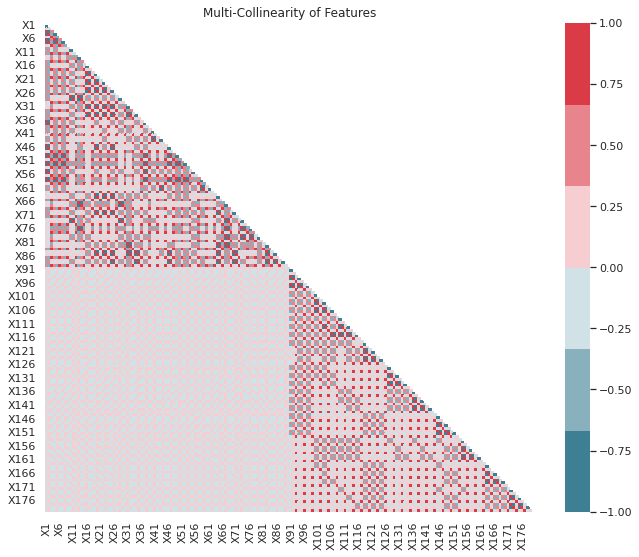

In [51]:
#Melihat nilai korelasi menggunakan heatmap
sns.set(style="white")
corr = fitur.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=False)
sns.heatmap(corr,mask=mask,cmap=cmap,square=True, ax=ax)
ax.set_title('Multi-Collinearity of Features')
plt.show()

In [52]:
#Melihat Sebaran Data
Xax=X_pca[:,0]
Yax=X_pca[:,1]


cdict={0:'red',1:'green'}
labl={0:'Tidak Berinteraksi',1:'Berinteraksi'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')


for l in np.unique(label):
    ix=np.where(label==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])

NameError: ignored

No handles with labels found to put in legend.


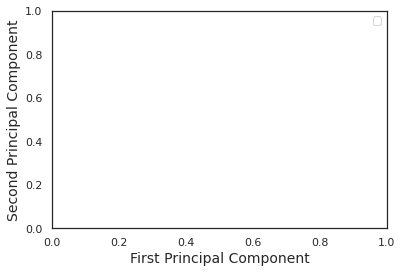

In [53]:
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

In [0]:
#Memisahkan Data Training 70% dan Testing 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=0)

In [0]:
#Mendefinisikan fungsi untuk bangun model
def grid_search_wrapper(param_grid, scoring, X_train, X_test, y_train, y_test,
refit_score='accuracy_score'):
    herf = HybridExtremeRotationForest (rbf_width=0.0, alpha=1.0, random_state=0)
    search = GridSearchCV(elmc, param_grid, cv = 10, scoring=scorers,
                          refit=refit_score, \
                          n_jobs=-1, return_train_score=True)
    search.fit(X_train, y_train)
    hasil_gridsearch = {
        'rangkuman':pd.DataFrame(search.cv_results_),
        'best_estimator': search.best_estimator_,
        'best_score_': search.best_score_,
        'best_parameters': search.best_params_}
    y_pred = search.predict(X_test)

In [56]:
# confusion matrix on the test data.
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=['pred_neg', 'pred_pos'], index=['neg', 'pos'])
target_names = ['Berinteraksi', 'Tidak Berinteraksi']
class_report_test = classification_report(y_test, y_pred,
                                          target_names=target_names, output_dict=True)
class_report_test = pd.DataFrame(class_report_test).transpose()

hasil_test = {
    'confusion_matrix': conf_mat,
    'class_report_test':class_report_test}

return {'hasil_gridsearch': hasil_gridsearch , 'hasil_test': hasil_test}


NameError: ignored

In [57]:
#Train Model
param_grid = {'n_hidden' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400,
500, 600, 700, 800, 900, 1000],
              'activation_func' : ['sine', 'tanh', 'tribas', 'inv_tribas', 'sigmoid', 'hardlim',
                                   'softlim', 'gaussian', 'multiquadric', 'inv_multiquadric']
             }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'spesificity_score': make_scorer(specificity_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}
grid_search_elmc = grid_search_wrapper(param_grid = param_grid, scoring =
                                       scorers, X_train = X_train,
                                       X_test = X_test,
                                       y_train = y_train,
                                       y_test = y_test,
                                       refit_score='accuracy_score')

NameError: ignored

In [58]:
#save hasil grid search di excel file
rangkuman_gridscv = grid_search_elmc['hasil_gridsearch']['rangkuman'].to_excel('rangkuman_gridscvL3r.xlsx')
best_estimator_gridscv = grid_search_elmc['hasil_gridsearch']['best_estimator']
best_score_gridscv = grid_search_elmc['hasil_gridsearch']['best_score_'] #ratarata nilai akurasi dari 10 fold
best_parameters_gridscv = grid_search_elmc['hasil_gridsearch']['best_parameters']
print({'best_estimator_gridscv':best_estimator_gridscv,
       'best_score_gridscv': best_score_gridscv,
       'best_parameters_gridscv': best_parameters_gridscv})
report_hasil_testing = grid_search_elmc['hasil_test']['class_report_test'].to_excel('report_hasil_testingL3r.xlsx')

NameError: ignored

In [59]:
#save model
import pickle
f = open('model_L3r.pckl', 'wb')
pickle.dump(grid_search_elmc,f)
f.close()

NameError: ignored

In [0]:
K =6
data_lewat = [1,2,3,5,6,7,8,9,10,11,12,13,14,15]
Nama_Data = ['Balance', 'Breast-can', 'Diabetes', 'Ecoli',  
                 'Iris', 'Liver', 'Sonar', 'Soybean', 'SpamBase',
                 'WaveForm', 'Wine', 'Digit', 'Hayes', 'Monk_1',
                 'Monk_2', 'Monk_3']
Nama_Metode = ['Rotation Forest', 'Random Forest', 'Decision Tree']
waktu  = {}
importance = {}
#fileHasil = 'HasilRun_Bab4.csv'
#dFile = open(fileHasil, 'w', encoding = 'utf-8')
for i in range(1,17)
    dData = {metode:{'scores':[]} for metode in Nama_Metode}
    if i not in data_lewat:
        ncbi_path = get_ncbi_path()
        import pandas as pd
        df = pd.read_csv('ncbi-datasets.csv')
        df.corr()
            
        vAcc_RF, vAcc_DT, vAcc_RndF  = [], [], []
        cv = StratifiedKFold(df, K)
        waktu[Nama_Data[i]]={}
        for train, test in cv:
                # Split Data
                x_train, x_test, y_train, y_test = X[train,:], X[test,:], Y[train], Y[test]
                # Rotation Forest
                mulai = time.time()
                rotfor = RotationForest()
                rotfor, importance_vars = rotfor.fit(x_train, y_train)
                selesai = time.time()-mulai
                waktu[Nama_Data[i]]['Rotation Forest'] = selesai

ValueError: The number of folds must be of Integral type.       Unnamed: 0        X1        X2  X3        X4        X5  X6        X7  \
0            Asp  0.761905  0.238095  24  0.785714  0.214286  40  0.793651   
1            Asp  0.761905  0.238095  24  0.785714  0.214286  40  0.793651   
2            Asp  0.761905  0.238095  24  0.785714  0.214286  40  0.793651   
3            Asp  0.761905  0.238095  24  0.785714  0.214286  40  0.793651   
4            Asp  0.761905  0.238095  24  0.785714  0.214286  40  0.793651   
5            Asp  0.761905  0.238095  24  0.785714  0.214286  40  0.793651   
6            Asp  0.761905  0.238095  24  0.785714  0.214286  40  0.793651   
7            Asp  0.761905  0.238095  24  0.785714  0.214286  40  0.793651   
8            Asp  0.761905  0.238095  24  0.785714  0.214286  40  0.793651   
9            Asp  0.761905  0.238095  24  0.785714  0.214286  40  0.793651   
10           Asp  0.761905  0.238095  24  0.785714  0.214286  40  0.793651   
11        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
12        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
13        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
14        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
15        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
16        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
17        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
18        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
19        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
20        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
21        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
22        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
23        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
24        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
25        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
26        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
27        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
28        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
29        capsid  0.727273  0.272727  25  0.668831  0.331169  64  0.649351   
...          ...       ...       ...  ..       ...       ...  ..       ...   
15946        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15947        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15948        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15949        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15950        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15951        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15952        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15953        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15954        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15955        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15956        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15957        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15958        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15959        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15960        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15961        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15962        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15963        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15964        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15965        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15966        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15967        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15968        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15969        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15970        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15971        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15972        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15973        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15974        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   
15975        Vpu  0.925926  0.074074   4  0.685185  0.314815  21  0.646341   

             X8   X9 ...      X172      X173  X174      X175      X176  X177  \
0      0.206349   56 ...  0.766667  0.233333    14  0.606557  0.393443    28   
1      0.206349   56 ...  0.487805  0.512195    16  0.518072  0.481928    38   
2      0.206349   56 ...  0.529412  0.470588    21  0.519608  0.480392    44   
3      0.206349   56 ...  0.581818  0.418182    26  0.463636  0.536364    49   
4      0.206349   56 ...  0.636364  0.363636    36  0.587097  0.412903    75   
5      0.206349   56 ...  0.572816  0.427184    56  0.548544  0.451456   100   
6      0.206349   56 ...  0.516667  0.483333    61  0.547718  0.452282   125   
7      0.206349   56 ...  0.528926  0.471074    54  0.539095  0.460905   119   
8      0.206349   56 ...  0.532787  0.467213    64  0.553279  0.446721   132   
9      0.206349   56 ...  0.560000  0.440000    75  0.550000  0.450000   147   
10     0.206349   56 ...  0.594427  0.405573   157  0.592879  0.407121   322   
11     0.350649  101 ...  0.700000  0.300000    11  0.650000  0.350000    22   
12     0.350649  101 ...  0.380952  0.619048     6  0.476190  0.523810    14   
13     0.350649  101 ...  0.655172  0.344828    12  0.576271  0.423729    26   
14     0.350649  101 ...  0.766667  0.233333    14  0.606557  0.393443    28   
15     0.350649  101 ...  0.666667  0.333333    12  0.524590  0.475410    24   
16     0.350649  101 ...  0.741935  0.258065    12  0.548387  0.451613    25   
17     0.350649  101 ...  0.718750  0.281250    11  0.646154  0.353846    24   
18     0.350649  101 ...  0.625000  0.375000    16  0.615385  0.384615    31   
19     0.350649  101 ...  0.727273  0.272727    11  0.621212  0.378788    30   
20     0.350649  101 ...  0.696970  0.303030    15  0.606061  0.393939    31   
21     0.350649  101 ...  0.657895  0.342105    17  0.592105  0.407895    37   
22     0.350649  101 ...  0.475000  0.525000    20  0.500000  0.500000    41   
23     0.350649  101 ...  0.609756  0.390244    18  0.554217  0.445783    43   
24     0.350649  101 ...  0.487805  0.512195    16  0.518072  0.481928    38   
25     0.350649  101 ...  0.487805  0.512195    16  0.518072  0.481928    38   
26     0.350649  101 ...  0.613636  0.386364    18  0.545455  0.454545    44   
27     0.350649  101 ...  0.545455  0.454545    17  0.522727  0.477273    43   
28     0.350649  101 ...  0.562500  0.437500    30  0.583333  0.416667    58   
29     0.350649  101 ...  0.854167  0.145833    12  0.701031  0.298969    31   
...         ...  ... ...       ...       ...   ...       ...       ...   ...   
15946  0.353659   40 ...  0.585714  0.414286   103  0.593824  0.406176   216   
15947  0.353659   40 ...  0.556150  0.443850    98  0.588235  0.411765   198   
15948  0.353659   40 ...  0.580645  0.419355    82  0.596774  0.403226   161   
15949  0.353659   40 ...  0.541667  0.458333    33  0.551724  0.448276    74   
15950  0.353659   40 ...  0.606667  0.393333    63  0.526667  0.473333   144   
15951  0.353659   40 ...  0.605634  0.394366    58  0.528169  0.471831   133   
15952  0.353659   40 ...  0.515152  0.484848    64  0.564394  0.435606   130   
15953  0.353659   40 ...  0.628049  0.371951    81  0.631098  0.368902   159   
15954  0.353659   40 ...  0.605128  0.394872    94  0.576923  0.423077   188   
15955  0.353659   40 ...  0.611399  0.388601    94  0.581395  0.418605   186   
15956  0.353659   40 ...  0.610465  0.389535    79  0.581395  0.418605   160   
15957  0.353659   40 ...  0.625731  0.374269    78  0.587719  0.412281   158   
15958  0.353659   40 ...  0.553398  0.446602    55  0.563107  0.436893   111   
15959  0.353659   40 ...  0.669811  0.330189    49  0.679245  0.320755   100   
15960  0.353659   40 ...  0.576000  0.424000    55  0.556000  0.444000   118   
15961  0.353659   40 ...  0.576000  0.424000    55  0.556000  0.444000   118   
15962  0.353659   40 ...  0.573171  0.426829    52  0.593939  0.406061    88   
15963  0.353659   40 ...  0.608696  0.391304    98  0.615176  0.384824   197   
15964  0.353659   40 ...  0.622378  0.377622    72  0.608392  0.391608   157   
15965  0.353659   40 ...  0.636829  0.363171   183  0.624521  0.375479   382   
15966  0.353659   40 ...  0.598425  0.401575   138  0.612967  0.387033   250   
15967  0.353659   40 ...  0.600000  0.400000   105  0.607143  0.392857   202   
15968  0.353659   40 ...  0.531335  0.468665   185  0.571429  0.428571   355   
15969  0.353659   40 ...  0.628369  0.371631   275  0.585816  0.414184   614   
15970  0.353659   40 ...  0.632035  0.367965   269  0.588745  0.411255   602   
15971  0.353659   40 ...  0.632653  0.367347   263  0.589949  0.410051   596   
15972  0.353659   40 ...  0.622785  0.377215   148  0.612658  0.387342   308   
15973  0.353659   40 ...  0.548276  0.451724   142  0.552496  0.447504   298   
15974  0.353659   40 ...  0.486842  0.513158    83  0.518033  0.481967   157   
15975  0.353659   40 ...  0.595092  0.404908    72  0.596330  0.403670   156   

           X178      X179  X180  Y  
0      0.576087  0.423913    41  1  
1      0.528000  0.472000    68  1  
2      0.529412  0.470588    73  1  
3      0.463855  0.536145    77  1  
4      0.592275  0.407725   116  1  
5      0.538710  0.461290   147  1  
6      0.569061  0.430939   168  1  
7      0.561644  0.438356   168  1  
8      0.576503  0.423497   182  1  
9      0.531111  0.468889   213  1  
10     0.605779  0.394221   462  1  
11     0.672131  0.327869    34  1  
12     0.476190  0.523810    27  1  
13     0.516854  0.483146    40  1  
14     0.576087  0.423913    41  1  
15     0.532609  0.467391    38  1  
16     0.559140  0.440860    42  1  
17     0.581633  0.418367    41  1  
18     0.561224  0.438776    48  1  
19     0.606061  0.393939    47  1  
20     0.565657  0.434343    50  1  
21     0.517544  0.482456    54  1  
22     0.520661  0.479339    65  1  
23     0.592000  0.408000    67  1  
24     0.536000  0.464000    66  1  
25     0.528000  0.472000    68  1  
26     0.598485  0.401515    65  1  
27     0.593985  0.406015    64  1  
28     0.569444  0.430556    82  1  
29     0.609589  0.390411    62  1  
...         ...       ...   ... ..  
15946  0.628165  0.371835   301  0  
15947  0.628114  0.371886   269  0  
15948  0.639485  0.360515   221  0  
15949  0.518349  0.481651   109  0  
15950  0.520000  0.480000   229  0  
15951  0.508197  0.491803   215  0  
15952  0.559194  0.440806   195  0  
15953  0.608519  0.391481   234  0  
15954  0.570940  0.429060   280  0  
15955  0.573150  0.426850   278  0  
15956  0.576402  0.423598   240  0  
15957  0.578947  0.421053   238  0  
15958  0.551613  0.448387   158  0  
15959  0.655172  0.344828   158  0  
15960  0.568000  0.432000   175  0  
15961  0.568000  0.432000   175  0  
15962  0.592742  0.407258   130  0  
15963  0.613718  0.386282   287  0  
15964  0.595349  0.404651   231  0  
15965  0.620426  0.379574   560  0  
15966  0.608639  0.391361   370  0  
15967  0.611111  0.388889   298  0  
15968  0.586582  0.413418   534  0  
15969  0.585343  0.414657   940  0  
15970  0.584135  0.415865   922  0  
15971  0.590777  0.409223   910  0  
15972  0.592405  0.407595   502  0  
15973  0.574541  0.425459   414  0  
15974  0.528384  0.471616   233  0  
15975  0.602851  0.397149   228  0  

[15976 rows x 182 columns] of type <class 'pandas.core.frame.DataFrame'> was passed.

In [0]:
import pandas as pd
df = pd.read_csv('ncbi-datasets.csv')
Y = data[:, 0]
X = data[:, 1:rows]
K = 10
vAcc_RF, vAcc_DT, vAcc_RndF  = [], [], []
cv = StratifiedKFold(Y, K)
waktu[Nama_Data[i]]={}
for train, test in cv:
    # Split Data
    x_train, x_test, y_train, y_test = X[train,:], X[test,:], Y[train], Y[test]
    # Rotation Forest
    mulai = time.time()
    rotfor = RotationForest()
    rotfor, importance_vars = rotfor.fit(x_train, y_train)
    selesai = time.time()-mulai
    waktu[Nama_Data[i]]['Rotation Forest'] = selesai

NameError: name 'data' is not defined

In [0]:
for train, test in cv:
                # Split Data
                x_train, x_test, y_train, y_test = X[train,:], X[test,:], Y[train], Y[test]
                # Rotation Forest
                mulai = time.time()
                rotfor = RotationForest()
                rotfor, importance_vars = rotfor.fit(x_train, y_train)
                selesai = time.time()-mulai
                waktu[Nama_Data[i]]['Rotation Forest'] = selesai

NameError: name 'cv' is not defined

In [0]:
dData['Rotation Forest']['scores'] = vAcc_RF
print('Data = "', Nama_Data[i],'", ukuran:',X.shape, ' #class =', len(set(Y)))
print(Nama_Metode[0],': Akurasi =',np.mean(vAcc_RF)*100,', Std Dev =',np.std(vAcc_RF)*100)
print(Nama_Metode[0],' 3 Mosst Important Variables = ', importance_vars)            
myBoxPlot(dData, dots = True, figName = Nama_Data[i]+'_boxPlot.png', Title = Nama_Data[i])
print(waktu)

NameError: name 'vAcc_RF' is not defined